# Simple stock analysis
First, we load the stock data


In [46]:
from pathlib import Path
import os
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [47]:
DATA_ROOT = Path("data/ETFs")

In [49]:
data_files = os.listdir(DATA_ROOT)[100:300]

start_size = 2
end_size = 30
step = 1

results = np.zeros((len(data_files), (end_size-start_size) // step))

for file_idx, data_file in enumerate(tqdm(data_files)):
    df = pd.read_csv(DATA_ROOT / data_file)

    for window_idx, window_size in enumerate(range(start_size, end_size, step)):
        df["SMA"] = df["Open"].rolling(window_size).mean()
        df_trunc = df[window_size-1:]

        cash = 100
        stock = 0
        for df_idx, row in df_trunc.iterrows():
            if 0 < row["Open"] <= row["SMA"] and df_idx != df.index[-1]:
                # BUY if price <= SMA
                buys = cash // row["Open"]
                stock += buys
                cash = cash % row["Open"]
            else:
                # SELL if price > SMA
                cash += stock * row["Open"]
                stock = 0
        results[file_idx, window_idx] = cash

100%|██████████| 200/200 [06:37<00:00,  1.99s/it]


In [63]:

results_norm = (results.T / results.max(axis=1)).T
print(results_norm)

[[0.95606901 0.69222967 0.75266413 ... 0.65310381 0.69863626 0.78470825]
 [0.55571001 0.63757484 0.65005829 ... 0.89750118 0.86108067 0.81622005]
 [0.57910727 0.69349609 0.59084337 ... 0.84452524 0.78871337 0.77588504]
 ...
 [0.93346593 0.97328633 0.91936102 ... 0.87347787 0.85459716 0.86954408]
 [0.52297085 0.47636206 0.66165001 ... 0.92671431 0.76643891 0.79971767]
 [1.         0.97695444 0.9585427  ... 0.67826768 0.67620205 0.71358619]]


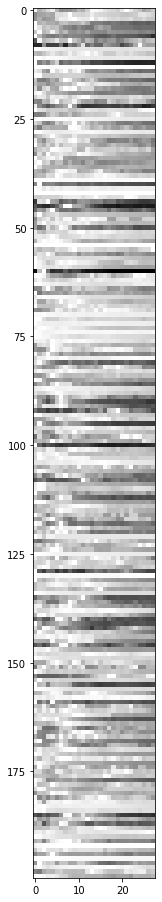

In [65]:
plt.figure(figsize=(16,16))
plt.imshow(results_norm, aspect='equal', cmap='gray')